In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

def fdm_transp(N, eps, b, advection, plotter):
    '''The simplest 1D diffusion implementation.'''

    # Gridsize
    h = 1.0/N

    # Define grid points
    x = np.linspace(0, 1, N+1)

    # Define zero matrix A of right size and insert
    # non zero entries
    A = np.zeros((N+1, N+1))
    
    # Compute rhs for f = sin(2 pi x)
    C1=np.exp(-1.0/eps)
    
    # Define tridiagonal part of A
    for i in range(1, N):
        if advection==0:
            A[i, i-1] = -0.5*h*b - eps
            A[i, i] = 2*eps
            A[i, i+1] =  0.5*h*b - eps
        elif advection==-1:
            A[i, i-1] = -h*b - eps
            A[i, i]   =  h*b + 2*eps
            A[i, i+1] = -eps
        elif advection==1: 
            A[i, i-1] = -eps
            A[i, i+1] =  h*b - eps
            A[i, i]   = -h*b + 2*eps
    
        F = (h**2)*b*np.ones(x.shape) #(h**2*np.exp(x)/(1.0-C1))/eps

    # Now adapt matrix and rhs according to bc data
    # Left boundary
    A[0, 0] = 1.0
    F[0] = 0.0

    # Right boundary
    A[N, N] = 1.0
    F[N] = 0.0

    # Solve AU = F
    # (We will introduce a sparse solver when we look at 2D problems)
    U = la.solve(A, F)

    # Compute real solution and error at grid points
    xf = np.linspace(0, 1, 1001)
    
    u = x-(np.exp((x-1)/eps)-C1)/(1-C1)
    ue=xf-(np.exp((xf-1)/eps)-C1)/(1-C1)

    err = max(np.abs(u - U))
    #print("Error |U - u|")
    #print(err)
    #print("Error max |U - u| ")
    #print(err.max())
    #print('---')
    # Clear figure first
    if plotter:
        plt.clf()

        # Plot solution on a high resolution grid
        plt.plot(xf, ue, "-b")

        # Plot discrete solution on chosen discretization grid
        plt.plot(x, U, "x-r")

        # Show figure (for non inline plotting)
        plt.show()
        
    return h, err

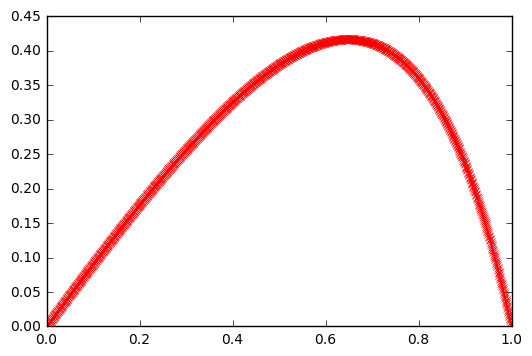

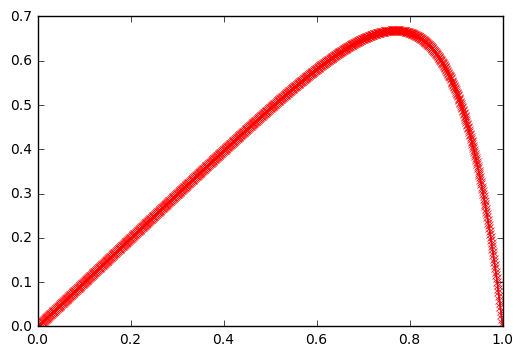

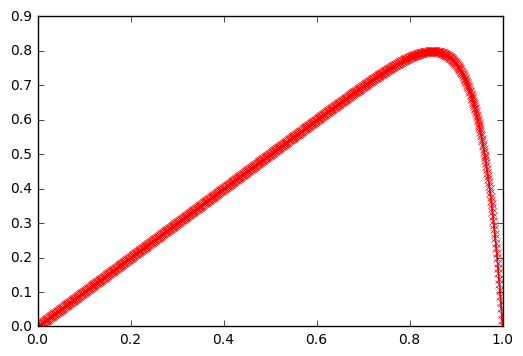

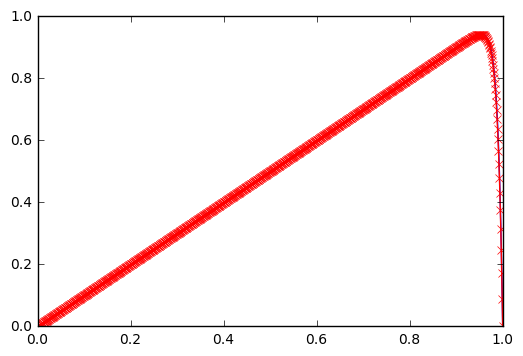

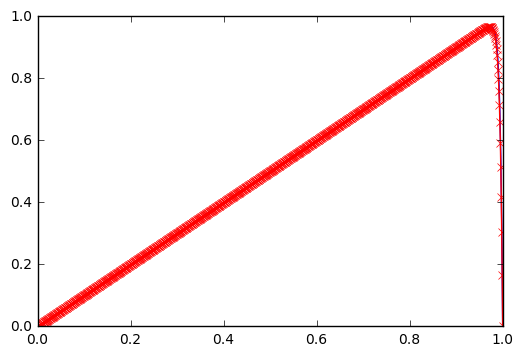

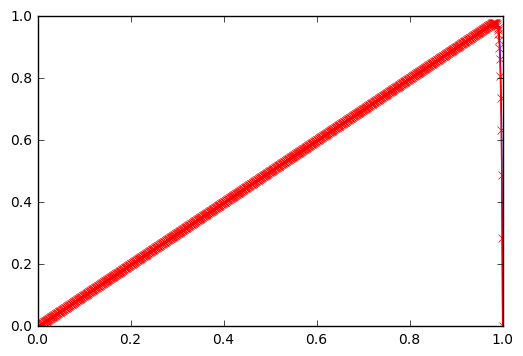

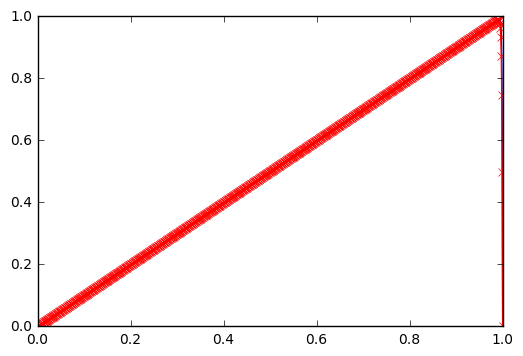

Convergence rate is:  0.999263806792


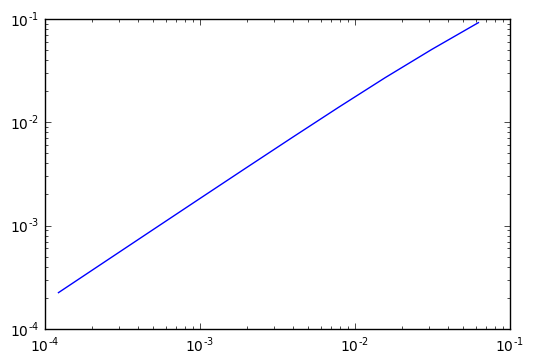

Convergence rate is:  0.992743660034


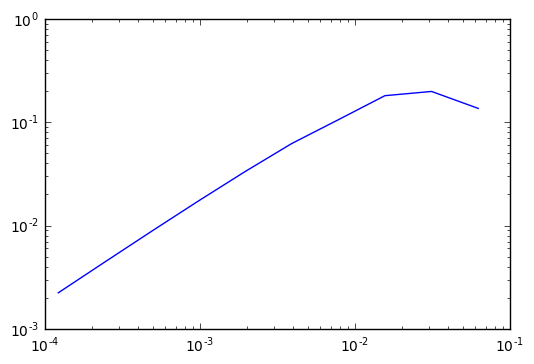

Convergence rate is:  0.932737301595


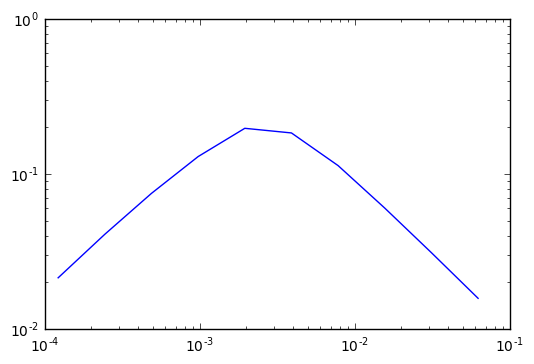

Convergence rate is:  0.390395958753


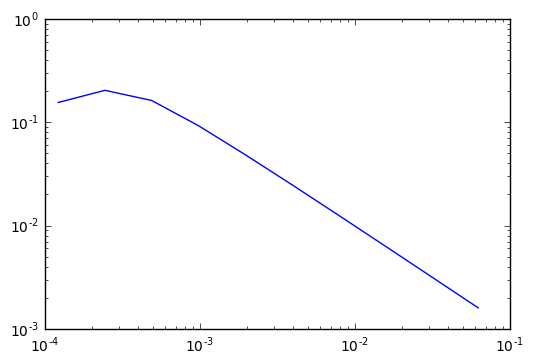

In [3]:
b=1.0
eps=0.01
C=np.exp(-1.0/eps)

ex_N=10001
xf = np.linspace(0, 1, ex_N) # x fine
ue = xf-(np.exp((xf-1)/eps)-C)/(1-C)

N = 1000
    # Boundary data inside definition
Nf = 10
errorp2 = np.zeros(Nf)
meshp2 = np.zeros(Nf)

# -1: D-, 0: D0, 1: D+
advection_scheme=-1

epsv=np.array([0.25,0.1,0.05,0.01,0.005,0.0025,0.001])
    # Solve for 4 levels    
for i in range(0,len(epsv)):
    #print(i)
    #fdm_poisson(N, bcs) 
    eps=epsv[i]
    h2,err2 = fdm_transp(N,eps,b,advection_scheme,1)
    
# convergence plots
errorp2 = np.zeros(Nf)
meshp2 = np.zeros(Nf)

for j in range(1,5):
    eps=10.0**(-j)
        # Solve for 4 levels    
    for i in range(0,Nf):
        #print(i)
        N=4*2**(2+i)
        h2,err2 = fdm_transp(N,eps,b,advection_scheme,0)
        meshp2[i]=h2
        errorp2[i]=err2

    conv_rate=np.log(errorp2[-2]/errorp2[-1])/np.log(2.0)
    print('Convergence rate is: ',conv_rate)

    plt.loglog(meshp2, errorp2, "-b")
    plt.show ()